###  

# Mushroom Dataset - DecisionTreeClassifier Model

> dataset source = https://archive.ics.uci.edu/ml/datasets/Mushroom

> decision tree - https://gust.dev/python/model-interpretability
> #### https://www.kaggle.com/akshay22071995/alone-in-the-woods-using-theil-s-u-for-survival

> #### # https://medium.com/@artkulakov/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1


## Load Python Packages

In [26]:
# LOAD REQUIRED PYTHON PACKAGES

# Let's load the packages
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as sp
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from subprocess import check_output
from sklearn import metrics

import graphviz
from matplotlib import pyplot as plt
import pydotplus
import cv2
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})



display('Packages Loaded on: ' + datetime.now().strftime("%Y-%m-%d @ %H:%M")) 



'Packages Loaded on: 2020-08-14 @ 10:54'

## Load Data

In [2]:
#- Set source file directory and path
## raw data set = agaricus-lepiota.data


default_path= '/Users/james.homolak@ibm.com/Desktop/mushroom/data/'
#display('Default Directory: ' + default_path)
source_path= input("Source File Path [Enter For Default]: ") or default_path
#display('Default Path Selected. ' + source_path)

source_name= input("Enter Source File Name: ")
file_path_name= source_path + source_name

display('Selected Filename and Path: '+ file_path_name)

Source File Path [Enter For Default]: 
Enter Source File Name: agaricus-lepiota.data


'Selected Filename and Path: /Users/james.homolak@ibm.com/Desktop/mushroom/data/agaricus-lepiota.data'

In [3]:
#- Load data into dataframe df_shrooms
df_shrooms = pd.read_csv(file_path_name, sep=',', header=None)

#- Add column names to df_shrooms
col_names= ('Class','CapShape','CapSurface','CapColor','Bruises','Odor','GillAttachment','GillSpacing','GillSize','GillColor','StalkShape','StalkRoot','StalkSurfaceAboveRing','StalkSurfaceBelowRing','StalkColorAboveRing','StalkColorBelowRing','VeilType','VeilColor','RingNumber','RingType','SporePrintColor','Population','Habitat')
df_shrooms.columns= col_names

df_shrooms.head()

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
### Mushroom Metadata

#### Column and value code descriptions


#### 1. class:                    edible, poison
#### 2. cap-shape:                bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s"																												
#### 3. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s"																													
#### 4. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y"																									
#### 5. bruises:                 bruises=t,no=f"																									
#### 6. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s"																														
#### 7. gill-attachment:          attached=a,descending=d,free=f,notched=n"																													
#### 8. gill-spacing:             close=c,crowded=w,distant=d"																													
#### 9. gill-size:                broad=b,narrow=n"																													
#### 10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y"																				
#### 11. stalk-shape:              enlarging=e,tapering=t"																												
#### 12. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?"	
#### 13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s"
#### 14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s"																													
#### 15. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 16. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 17. veil-type:                partial=p,universal=u"																													
#### 18. veil-color:               brown=n,orange=o,white=w,yellow=y"																														
#### 19. ring-number:              none=n,one=o,two=t"																													
#### 20. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z"																														
#### 21. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y"																														
#### 22. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y"																													
#### 23. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d"



## Dataset EDA

In [5]:
# basic review

display(df_shrooms.shape)
display(df_shrooms.dtypes)



(8124, 23)

Class                    object
CapShape                 object
CapSurface               object
CapColor                 object
Bruises                  object
Odor                     object
GillAttachment           object
GillSpacing              object
GillSize                 object
GillColor                object
StalkShape               object
StalkRoot                object
StalkSurfaceAboveRing    object
StalkSurfaceBelowRing    object
StalkColorAboveRing      object
StalkColorBelowRing      object
VeilType                 object
VeilColor                object
RingNumber               object
RingType                 object
SporePrintColor          object
Population               object
Habitat                  object
dtype: object

In [6]:
# Frequency distibutions and percents for each dataframe column

colnames=df_shrooms.columns

for col in colnames:
    display('------------------------------------')
    display(col)
    display(pd.concat([df_shrooms[col].value_counts(),df_shrooms[col].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage')))
    display()


'------------------------------------'

'Class'

,counts,percentage
e,4208,51.797144
p,3916,48.202856


'------------------------------------'

'CapShape'

,counts,percentage
x,3656,45.002462
f,3152,38.798621
k,828,10.192024
b,452,5.563762
s,32,0.393895
c,4,0.049237


'------------------------------------'

'CapSurface'

,counts,percentage
y,3244,39.931068
s,2556,31.462334
f,2320,28.557361
g,4,0.049237


'------------------------------------'

'CapColor'

,counts,percentage
n,2284,28.114229
g,1840,22.648941
e,1500,18.463811
y,1072,13.195470
w,1040,12.801576
b,168,2.067947
p,144,1.772526
c,44,0.541605
r,16,0.196947
u,16,0.196947


'------------------------------------'

'Bruises'

,counts,percentage
f,4748,58.444116
t,3376,41.555884


'------------------------------------'

'Odor'

,counts,percentage
n,3528,43.426883
f,2160,26.587888
y,576,7.090103
s,576,7.090103
l,400,4.923683
a,400,4.923683
p,256,3.151157
c,192,2.363368
m,36,0.443131


'------------------------------------'

'GillAttachment'

,counts,percentage
f,7914,97.415066
a,210,2.584934


'------------------------------------'

'GillSpacing'

,counts,percentage
c,6812,83.85032
w,1312,16.14968


'------------------------------------'

'GillSize'

,counts,percentage
b,5612,69.079271
n,2512,30.920729


'------------------------------------'

'GillColor'

,counts,percentage
b,1728,21.270310
p,1492,18.365337
w,1202,14.795667
n,1048,12.900049
g,752,9.256524
h,732,9.010340
u,492,6.056130
k,408,5.022157
e,96,1.181684
y,86,1.058592


'------------------------------------'

'StalkShape'

,counts,percentage
t,4608,56.720827
e,3516,43.279173


'------------------------------------'

'StalkRoot'

,counts,percentage
b,3776,46.479567
?,2480,30.526834
e,1120,13.786312
c,556,6.843919
r,192,2.363368


'------------------------------------'

'StalkSurfaceAboveRing'

,counts,percentage
s,5176,63.712457
k,2372,29.197440
f,552,6.794682
y,24,0.295421


'------------------------------------'

'StalkSurfaceBelowRing'

,counts,percentage
s,4936,60.758247
k,2304,28.360414
f,600,7.385524
y,284,3.495815


'------------------------------------'

'StalkColorAboveRing'

,counts,percentage
w,4464,54.948301
p,1872,23.042836
g,576,7.090103
n,448,5.514525
b,432,5.317578
o,192,2.363368
e,96,1.181684
c,36,0.443131
y,8,0.098474


'------------------------------------'

'StalkColorBelowRing'

,counts,percentage
w,4384,53.963565
p,1872,23.042836
g,576,7.090103
n,512,6.302314
b,432,5.317578
o,192,2.363368
e,96,1.181684
c,36,0.443131
y,24,0.295421


'------------------------------------'

'VeilType'

,counts,percentage
p,8124,100.0


'------------------------------------'

'VeilColor'

,counts,percentage
w,7924,97.538159
o,96,1.181684
n,96,1.181684
y,8,0.098474


'------------------------------------'

'RingNumber'

,counts,percentage
o,7488,92.171344
t,600,7.385524
n,36,0.443131


'------------------------------------'

'RingType'

,counts,percentage
p,3968,48.842935
e,2776,34.170359
l,1296,15.952733
f,48,0.590842
n,36,0.443131


'------------------------------------'

'SporePrintColor'

,counts,percentage
w,2388,29.394387
n,1968,24.224520
k,1872,23.042836
h,1632,20.088626
r,72,0.886263
y,48,0.590842
o,48,0.590842
b,48,0.590842
u,48,0.590842


'------------------------------------'

'Population'

,counts,percentage
v,4040,49.729197
y,1712,21.073363
s,1248,15.361891
n,400,4.923683
a,384,4.726736
c,340,4.185130


'------------------------------------'

'Habitat'

,counts,percentage
d,3148,38.749385
g,2148,26.440177
p,1144,14.081733
l,832,10.241260
u,368,4.529788
m,292,3.594289
w,192,2.363368


In [7]:
# check for column cardinality

display([df_shrooms[x].unique().shape[0] for x in df_shrooms.columns])

# df_shrooms.nunique().sort_values(ascending=False)

for feature in df_shrooms.columns:
    uniq = np.unique(df_shrooms[feature])
    print('{}: {} distinct values -  {}'.format(feature,len(uniq),uniq))




[2, 6, 4, 10, 2, 9, 2, 2, 2, 12, 2, 5, 4, 4, 9, 9, 1, 4, 3, 5, 9, 6, 7]

Class: 2 distinct values -  ['e' 'p']
CapShape: 6 distinct values -  ['b' 'c' 'f' 'k' 's' 'x']
CapSurface: 4 distinct values -  ['f' 'g' 's' 'y']
CapColor: 10 distinct values -  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
Bruises: 2 distinct values -  ['f' 't']
Odor: 9 distinct values -  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
GillAttachment: 2 distinct values -  ['a' 'f']
GillSpacing: 2 distinct values -  ['c' 'w']
GillSize: 2 distinct values -  ['b' 'n']
GillColor: 12 distinct values -  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
StalkShape: 2 distinct values -  ['e' 't']
StalkRoot: 5 distinct values -  ['?' 'b' 'c' 'e' 'r']
StalkSurfaceAboveRing: 4 distinct values -  ['f' 'k' 's' 'y']
StalkSurfaceBelowRing: 4 distinct values -  ['f' 'k' 's' 'y']
StalkColorAboveRing: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
StalkColorBelowRing: 9 distinct values -  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
VeilType: 1 distinct values -  ['p']
VeilColor: 4 distinct values -  ['n' 'o' '

In [8]:
#- describe function for object types only

df_shrooms.describe(include = 'object').T 

,count,unique,top,freq
Class,8124,2,e,4208
CapShape,8124,6,x,3656
CapSurface,8124,4,y,3244
CapColor,8124,10,n,2284
Bruises,8124,2,f,4748
Odor,8124,9,n,3528
GillAttachment,8124,2,f,7914
GillSpacing,8124,2,c,6812
GillSize,8124,2,b,5612
GillColor,8124,12,b,1728


In [9]:
# troublesome columns handling

df_shrooms_clean= df_shrooms.copy()

# column veil_type has only one value therfore no meaning to the model
df_shrooms_clean=df_shrooms_clean.drop(["VeilType"],axis=1)
display("Column VeilType has been removed")

# Note: column StalkRoot has ? as a value 2480 time and is 30.5% of the distribution
# df_shrooms_clean = df_shrooms_clean[df_shrooms_clean['StalkRoot'] != '?'] 
# display("Rows with Stalkroot= ? have been removed")

# review new dataframe shape
display(df_shrooms_clean.shape)
df_shrooms_clean.describe(include = 'object').T 

'Column VeilType has been removed'

(8124, 22)

,count,unique,top,freq
Class,8124,2,e,4208
CapShape,8124,6,x,3656
CapSurface,8124,4,y,3244
CapColor,8124,10,n,2284
Bruises,8124,2,f,4748
Odor,8124,9,n,3528
GillAttachment,8124,2,f,7914
GillSpacing,8124,2,c,6812
GillSize,8124,2,b,5612
GillColor,8124,12,b,1728


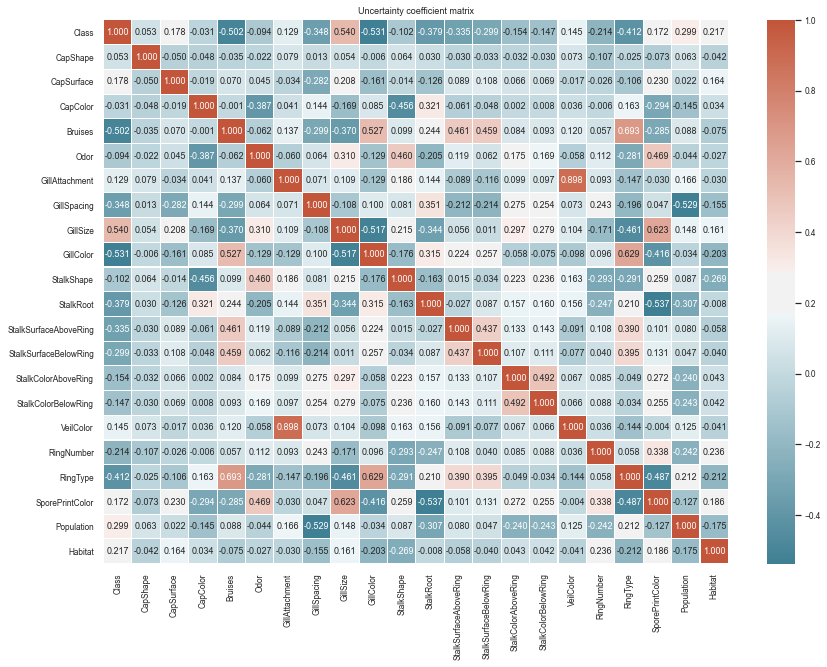

In [10]:
# Plot Correlation Matrix

# All columns are categorial so convert it with LabelEncoder to ordinal values.
df_shrooms_enc= df_shrooms_clean.copy()
labelencoder=LabelEncoder()
for column in df_shrooms_enc.columns:
    df_shrooms_enc[column] = labelencoder.fit_transform(df_shrooms_enc[column])

# Plot correlation matrix
cmap1 = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.figure(figsize=(14,10))
sns.set(font_scale=.75)
sns.heatmap(df_shrooms_enc.corr(),linewidths=.1,cmap=cmap1, annot=True, fmt="0.3f").set_title("Uncertainty coefficient matrix")
plt.yticks(rotation=0);

Text(0.5, 1.0, '0= Edible  1= Poisonous')

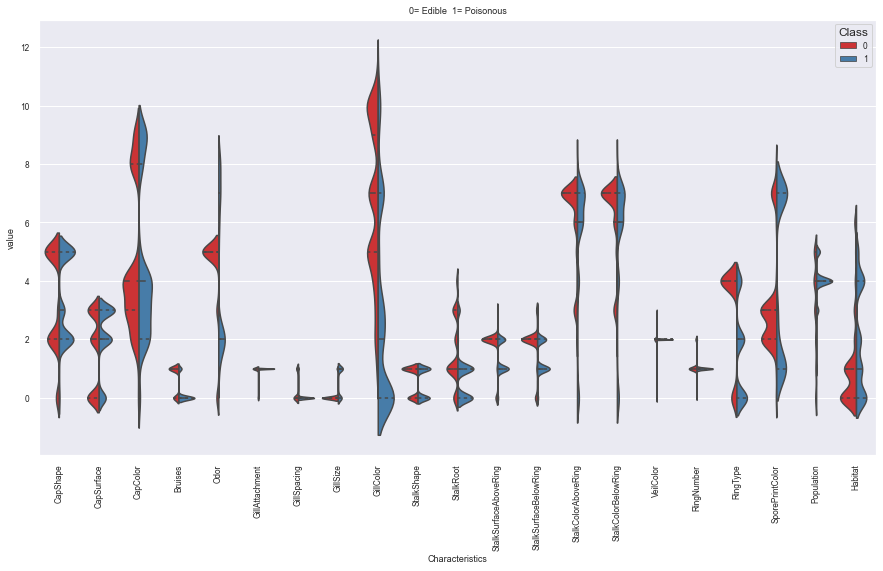

In [11]:
# The violin plot below represents the distribution of the classification characteristics. 
df=df_shrooms_enc.copy()

# remove y variable (Class) from plot set
df_no_class= df.loc[:, df.columns != 'Class']

df_div = pd.melt(df, "Class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(15,8))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="Class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["Class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
plt.title('0= Edible  1= Poisonous')

In [12]:
# calculate categorical correlation using Theil methodology

from collections import Counter
import math
import scipy.stats as ss

#   conditional_entropy(x,y):
#     :param x: list / NumPy ndarray / Pandas Series
#         A sequence of measurements
#     :param y: list / NumPy ndarray / Pandas Series
#         A sequence of measurements
#     :return: float


# helper functions

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x




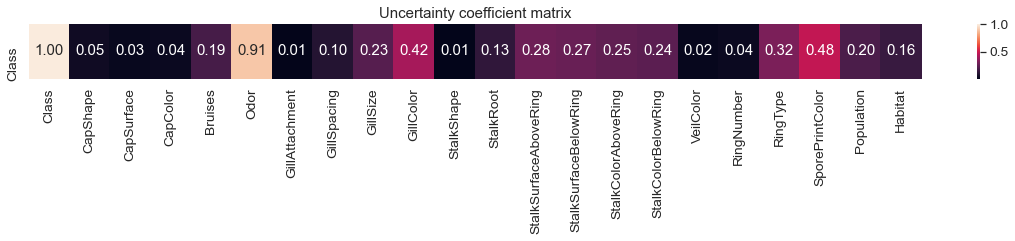

'Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.'

In [40]:
# plot Theil Uncertainty matrix

# we want to know if there's a certain feature that maximizes the information about the class. 
# where 0 means that feature y provides no information about feature x, and 1 means that 
# feature y provides full information abpout features x's value.


theilu = pd.DataFrame(index=['Class'],columns=df_shrooms_clean.columns)
columns = df_shrooms_enc.columns

for j in range(0,len(columns)):
    u = theil_u(df_shrooms_clean['Class'].tolist(),df_shrooms_clean[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.set(font_scale=1.25)
sns.heatmap(theilu,annot=True,fmt='.2f').set_title("Uncertainty coefficient matrix")
plt.show()


display('Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.')

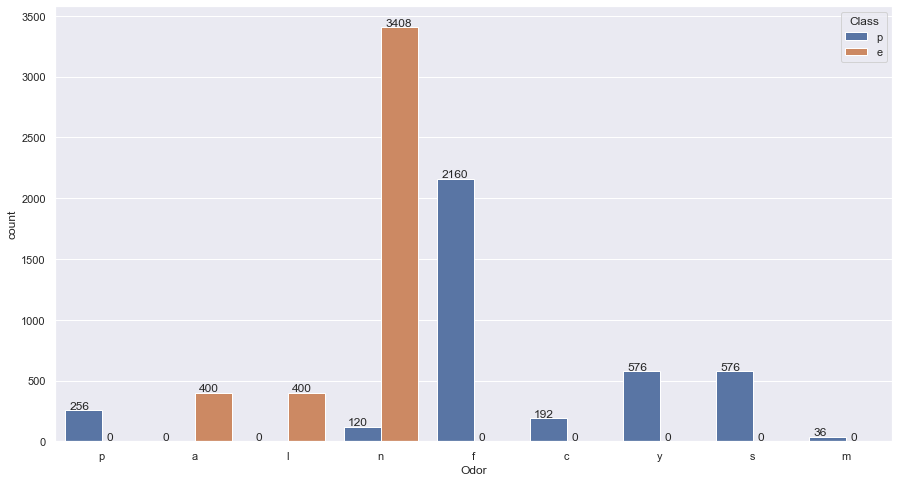

'Odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s'

'We can tell if a mushroom is edible or not based on Odor. But what about all those mushrooms with no Odor?'

In [14]:
# odor is very dominant - plot and review

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Odor',hue='Class',data=df_shrooms_clean)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

# Odor domain values

display('Odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s')

display('We can tell if a mushroom is edible or not based on Odor. But what about all those mushrooms with no Odor?')

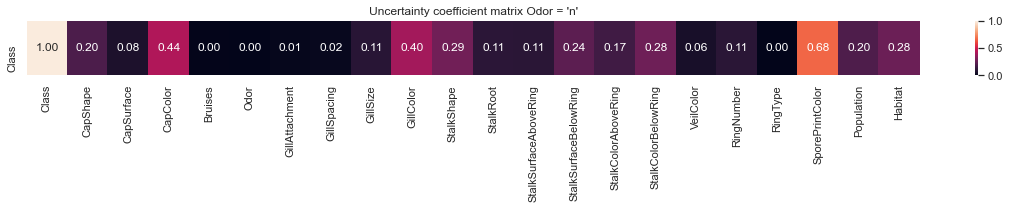

'Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.'

In [15]:
# Check correlation for no Odor (Odor='n') type

no_odor = df_shrooms_clean[df_shrooms_clean['Odor'].isin(['n'])]
for j in range(0,len(columns)):
    u = theil_u(no_odor['Class'].tolist(),no_odor[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f').set_title("Uncertainty coefficient matrix Odor = 'n'")
plt.show()

display('Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.')

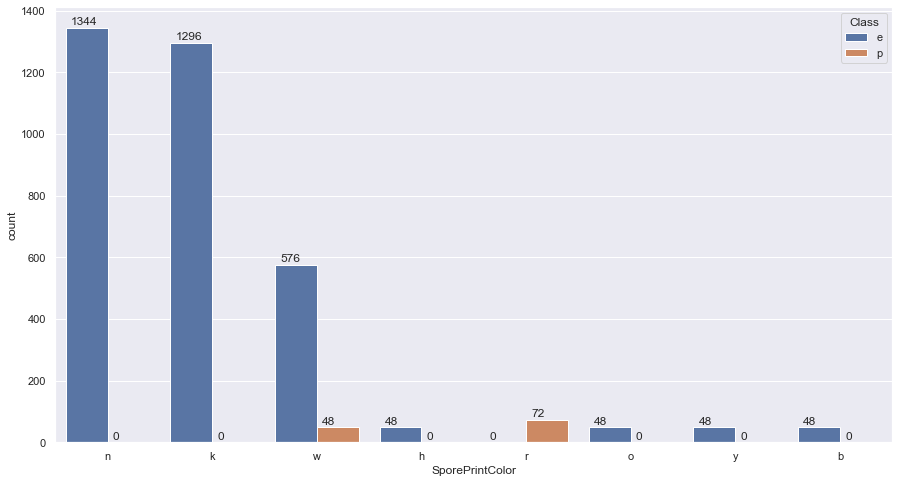

'spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w,yellow=y"'

In [16]:
# plot Odor='n' against dominant SporePrintColor

sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='SporePrintColor',hue='Class',data=no_odor)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

display('spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w,yellow=y"')


In [17]:
# We can tell odorless mushrooms apart by their spore color - unless it's white, then it's still ambiguous.
# how many mushrooms are we already able telling if they're ediable or not:

no_odor_w = no_odor[no_odor['SporePrintColor'].isin(['w'])]
pot= (len(df_shrooms_clean.index) - len(no_odor_w.index)) / len(df_shrooms_clean.index)

display(str(pot)+ ' = Percent Of Data explained by Odor & SporePrintColor != w')

'0.9231905465288035 = Percent Of Data explained by Odor & SporePrintColor != w'

#### So we can now determine the class of 92% of the mushrooms we know of.
####  If the mushroom smells like almond (a) or anise (l), it is edible.
#### If it has no odor, check its spore color - if not green (r), it is edible. If it is white, we are not sure.

In [18]:
# Encode categorical values to numbers based on X & y 

# # Encode the target class, 1 is deadly 0 is safe
# labels = pd.get_dummies(labels)['p'] 


y = df_shrooms_clean['Class']
X = df_shrooms_clean.drop(['Class'], axis=1)

X_enc = pd.get_dummies(X)
y_enc =  pd.get_dummies(y)['p'] 


display(X_enc.head())
y_enc.head()

,CapShape_b,CapShape_c,CapShape_f,CapShape_k,CapShape_s,CapShape_x,CapSurface_f,CapSurface_g,CapSurface_s,CapSurface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


0    1
1    0
2    0
3    1
4    0
Name: p, dtype: uint8

In [19]:
# split the data into x(training data) and y (results)

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=.50, random_state=24)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4062, 116)

(4062, 116)

(4062,)

(4062,)

In [20]:
# review data splits

display('X_train',X_train.head(),X_train.shape)
display('y_train',y_train.head(),y_train.shape)
display('X_test', X_test.head(),X_test.shape)
display('y_test', y_test.head(),y_test.shape)

'X_train'

,CapShape_b,CapShape_c,CapShape_f,CapShape_k,CapShape_s,CapShape_x,CapSurface_f,CapSurface_g,CapSurface_s,CapSurface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
6058,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3375,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2615,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
185,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3898,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


(4062, 116)

'y_train'

6058    1
3375    0
2615    0
185     1
3898    1
Name: p, dtype: uint8

(4062,)

'X_test'

,CapShape_b,CapShape_c,CapShape_f,CapShape_k,CapShape_s,CapShape_x,CapSurface_f,CapSurface_g,CapSurface_s,CapSurface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
1139,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2924,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1128,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4791,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
890,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


(4062, 116)

'y_test'

1139    0
2924    0
1128    0
4791    1
890     0
Name: p, dtype: uint8

(4062,)

In [49]:
# Train (fit) and Predict (test) model

depth=6

# train the model
mush_tree= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth= depth,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=24, splitter='best')

mush_tree.fit(X_train,y_train)

# predict
y_pred = mush_tree.predict(X_test)
y_pred

# test the model Return the mean accuracy on the given test data and labels.
for i in range(1,depth):
    mush_tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    mush_tree.fit(X_train,y_train)
    y_pred = mush_tree.predict(X_test)
    print("Max depth: {} - accuracy:".format(i), accuracy_score(y_test, y_pred))


Max depth: 1 - accuracy: 0.8855243722304283
Max depth: 2 - accuracy: 0.9547021171836534
Max depth: 3 - accuracy: 0.98301329394387
Max depth: 4 - accuracy: 0.9903988183161004
Max depth: 5 - accuracy: 0.9982767109798129


In [50]:
#- generate classification report


# Accuracy - Accuracy is a ratio of correctly predicted observation to the total observations. 
# Precision - Precision is the ratio of correctly predicted positive observations 
#     to the total predicted positive observations. 
# Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations
#     to the all observations in actual class - yes. 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      1930

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



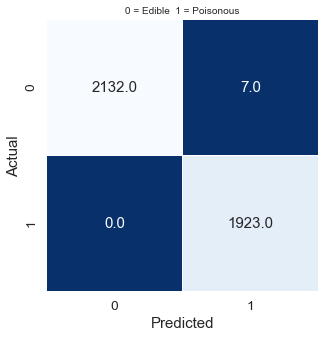

In [51]:
# print(confusion_matrix(y_test, y_pred))

# create a confusion mastrix
cm= confusion_matrix(y_pred, y_test)

# plot cm
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r', cbar = False);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('0 = Edible  1 = Poisonous', size = 10)
plt.show()



In [47]:
# review model metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.866322008862629
Mean Squared Error: 0.11447562776957164
Root Mean Squared Error: 0.3383424711288425


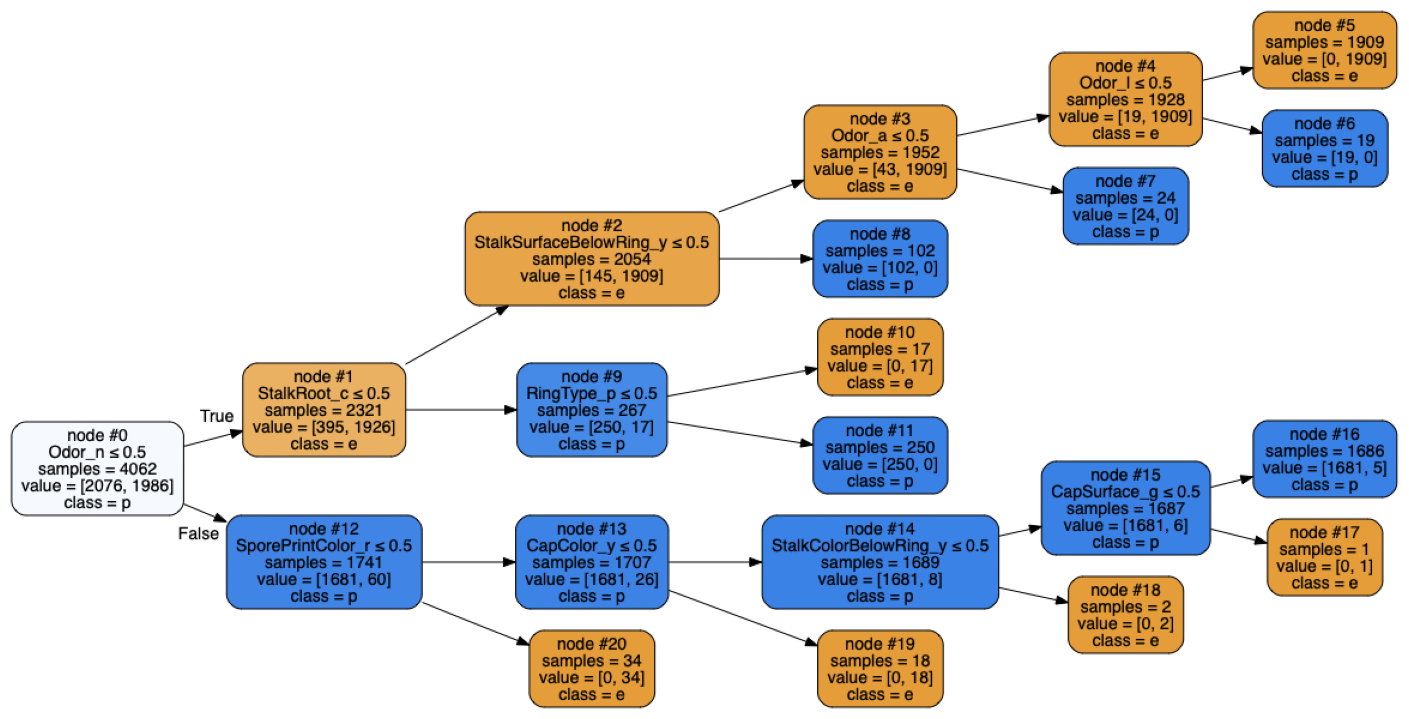

In [52]:
# render decision model tree

# http://www.graphviz.org/doc/info/shapes.html#html
# https://medium.com/@artkulakov/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1

import cv2

dot_data = tree.export_graphviz(mush_tree, out_file=None,
                                feature_names= X_train.columns,
                               class_names= df_shrooms['Class'].unique(),
                               filled=True, rounded=True,
                               special_characters=True,
                               rotate=True,
                               node_ids=True, impurity=False)

graph = graphviz.Source(dot_data)
graph

# Export resulting tree to DOT source code string
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('mush_tree.png')

# resize decision tree image
img = cv2.imread('mush_tree.png')
plt.figure(figsize = (25, 20))
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.imshow(img)



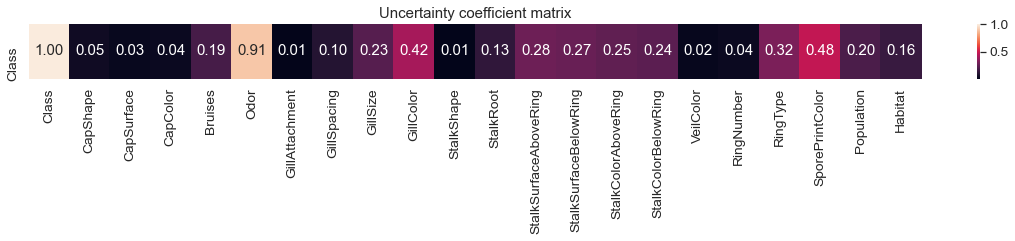

'Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.'

In [39]:
# plot Theil Uncertainty matrix

# we want to know if there's a certain feature that maximizes the information about the class. 
# where 0 means that feature y provides no information about feature x, and 1 means that 
# feature y provides full information abpout features x's value.


theilu = pd.DataFrame(index=['Class'],columns=df_shrooms_clean.columns)
columns = df_shrooms_enc.columns

for j in range(0,len(columns)):
    u = theil_u(df_shrooms_clean['Class'].tolist(),df_shrooms_clean[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.set(font_scale=1.25)
sns.heatmap(theilu,annot=True,fmt='.2f').set_title("Uncertainty coefficient matrix")
plt.show()


display('Where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x_s value.')